In [1]:
import numpy as np
from scipy import linalg

In [2]:
A = np.array([
        [1, 9, 2, 1, 1],
        [10, 1, 2, 1, 1],
        [1, 0, 5, 1, 1],
        [2, 1, 1, 2, 9],
        [2, 1, 2, 13, 2],
             ])
B = np.array([170, 180, 140, 180, 350]).reshape((5,1))

In [5]:
A_inv = linalg.inv(A)
A_inv

array([[-0.01077558,  0.10655847, -0.03565252, -0.0058534 , -0.00372489],
       [ 0.11287748, -0.00512172, -0.04010909, -0.00658507, -0.0041905 ],
       [ 0.0052991 , -0.01536517,  0.21300608, -0.01975522, -0.0125715 ],
       [-0.0064077 , -0.01070906, -0.02325839, -0.01376879,  0.08214713],
       [-0.00931223, -0.01902355, -0.00611946,  0.1183983 , -0.01556472]])

In [6]:
x = A_inv @ B
x

array([[10.],
       [10.],
       [20.],
       [20.],
       [10.]])

In [7]:
linalg.det(A)

45102.0

In [8]:
#Interpolating Polynomials With Linear Systems
A = np.array([[1,1,1],[1,2,4],[1,3,9]])
linalg.det(A)

1.9999999999999996

In [9]:
B = np.array([5,13,25]).reshape((3,1))

In [10]:
a = linalg.inv(A)@B
a

array([[1.],
       [2.],
       [2.]])

In [11]:
# as per this result let put result value in equation
# (1,5), (2,13), (2,25)
#  we can see 2 and 3rd option x is same and y is diffrent, it's not possible to find a function that includes both ponts.

# a0+a1+a2 = 5
# a0+2a1+4a2 = 13
# a0+2a1+4a2 = 25

In [12]:
A = np.array([[1,1,1],[1,2,4],[1,2,4]])
linalg.det(A)

-1.6653345369377348e-16

In [51]:
A = np.array([[1, 1, 1], [1, 2, 4], [1, 2, 4]])
linalg.det(A)

-1.6653345369377348e-16

In [52]:
A

array([[1, 1, 1],
       [1, 2, 4],
       [1, 2, 4]])

In [15]:
b = np.array([5, 13, 25]).reshape((3, 1))
# x = linalg.inv(A) @ b #this give error: raise LinAlgError("singular matrix")
p, *_ = linalg.lstsq(A,B)
p

array([[-0.42857143],
       [ 1.14285714],
       [ 4.28571429]])

In [16]:
#let's visualise the solution provided by plotting the parabola
import matplotlib.pyplot as plt

In [19]:
x = np.linspace(0,3,1000)
y = p[0] + p[1] * x + p[2] * x ** 2

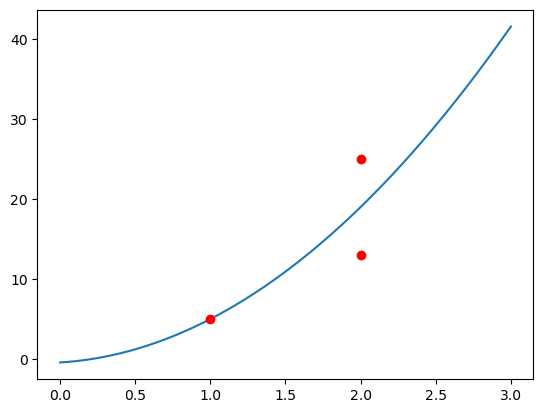

In [20]:
plt.plot(x,y)
plt.plot(1,5, "ro")
plt.plot(2,13, "ro")
plt.plot(2,25, "ro")

In [21]:
#Obtaining Least Squares Solutions Using a Pseudoinverse

In [22]:
A = np.array([[1, 1, 1], [1, 2, 4], [1, 2, 4]])
b = np.array([5, 13, 25]).reshape((3, 1))

In [23]:
A_pinv = linalg.pinv(A)
A_pinv

array([[ 1.        , -0.14285714, -0.14285714],
       [ 0.5       , -0.03571429, -0.03571429],
       [-0.5       ,  0.17857143,  0.17857143]])

In [24]:
p2 = A_pinv @ b
p2

array([[-0.42857143],
       [ 1.14285714],
       [ 4.28571429]])

In [25]:
# Predicting Car Prices With Least Squares
# Preparing the Data

import pandas as pd

In [27]:
cars_data = pd.read_csv("vehicles_cleaned.csv")

In [29]:
cars_data.columns

Index(['price', 'year', 'condition', 'cylinders', 'fuel', 'odometer',
       'transmission', 'size', 'type'],
      dtype='object')

In [30]:
cars_data.iloc[0]

price                  7000
year                   2011
condition              good
cylinders       4 cylinders
fuel                    gas
odometer              76202
transmission      automatic
size                compact
type                  sedan
Name: 0, dtype: object

In [31]:
cars_data_dummies = pd.get_dummies(
    cars_data,
    columns = [
        "condition",
        "cylinders",
        "fuel",
        "transmission",
        "size",
        "type",
    ],
    drop_first = True,
)

In [32]:
cars_data_dummies

,price,year,odometer,condition_fair,condition_good,condition_like new,condition_new,condition_salvage,cylinders_6 cylinders,fuel_gas,transmission_manual,size_full-size,size_mid-size,size_sub-compact,type_hatchback,type_sedan,type_wagon
0,7000,2011,76202,False,True,False,False,False,False,True,False,False,False,False,False,True,False
1,10900,2014,63000,False,False,False,False,False,False,True,True,False,False,False,False,True,False
2,13300,2012,96000,False,False,False,False,False,True,True,False,False,True,False,False,True,False
3,14900,2016,48900,False,False,False,False,False,False,True,False,False,True,False,False,True,False
4,18900,2016,58112,False,False,False,False,False,True,True,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9327,9200,2011,43999,False,True,False,False,False,True,True,False,True,False,False,False,True,False
9328,18995,2014,98889,False,False,False,False,False,True,True,False,True,False,False,False,True,False
9329,9885,2012,82000,False,False,False,False,False,False,True,False,False,True,False,True,False,False
9330,750,2002,40000,False,False,False,False,True,False,True,True,False,False,False,False,False,False


In [54]:
cars_data_dummies["intercept"] = 1
cars_data_dummies.to_numpy()

array([[7000, 2011, 76202, ..., True, False, 1],
       [10900, 2014, 63000, ..., True, False, 1],
       [13300, 2012, 96000, ..., True, False, 1],
       ...,
       [9885, 2012, 82000, ..., False, False, 1],
       [750, 2002, 40000, ..., False, False, 1],
       [4800, 2002, 58000, ..., False, False, 1]], dtype=object)

In [35]:
A = cars_data_dummies.drop(columns=["price"]).to_numpy()
A

array([[2011, 76202, False, ..., True, False, 1],
       [2014, 63000, False, ..., True, False, 1],
       [2012, 96000, False, ..., True, False, 1],
       ...,
       [2012, 82000, False, ..., False, False, 1],
       [2002, 40000, False, ..., False, False, 1],
       [2002, 58000, False, ..., False, False, 1]], dtype=object)

In [36]:
b = cars_data_dummies.loc[:,"price"].to_numpy()
b

array([ 7000, 10900, 13300, ...,  9885,   750,  4800], dtype=int64)

In [49]:
A = cars_data_dummies.drop(columns=["price"]).to_numpy()
b = cars_data_dummies.loc[:, "price"].to_numpy()
A.shape

(9332, 17)

In [44]:
from scipy import linalg

In [45]:
p, *_ = linalg.lstsq(A, b)

ValueError: object arrays are not supported